In [1]:
import numpy as np
import Labber
import matplotlib.pyplot as plt
from matplotlib import cm
import lmfit as lm

# plt.rc('text', usetex=True)
# plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{physics}')
# plt.rc('font', **{'family':'sans-serif'} )

In [3]:
# Load numpy file if no labber installation

fin = r'..\..\Data\Fig2 Data\3Q Check Gamma.hdf5'

log = Labber.LogFile(fin)
data = log.getData('State Discriminator 2 States - Population Qb3 0')

data = (data-np.mean(data.flatten()))*2


In [4]:
def cos_fit(t, data):
    def fun(t, A, phi, B):
        return A*np.cos(t - phi) + B
    cosModel = lm.Model(fun)
    params = cosModel.make_params()
    params['A'].set(value=np.max(data), min=0, max=1, vary=False)
    params['phi'].set(value=np.pi/2, min=-2*np.pi, max=2*np.pi)
    params['B'].set(value=0, min=-0.1, max=0.1)

    res = cosModel.fit(data, params, t=t)
    return res

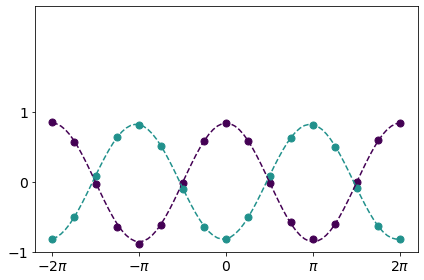

In [5]:
# Uncomment with a linked latex installation

phi = np.linspace(-2*np.pi, 3*np.pi, 101)
colors = cm.viridis(np.linspace(0, 1, 5))

fit1 = cos_fit(phi, data[0, :])
fit2 = cos_fit(phi, data[1, :])

fig, ax = plt.subplots()
ax.plot(phi[:81:5]/np.pi, data[0, :81:5], '.', color=colors[0], label=r'$|1+0\rangle$', markersize=14)
ax.plot(phi[:81:5]/np.pi, data[1, :81:5], '.', color=colors[2], label=r'$|1+1\rangle$', markersize=14)
ax.plot(phi[:81]/np.pi, fit1.best_fit[:81], '--', color=colors[0])
ax.plot(phi[:81]/np.pi, fit2.best_fit[:81], '--', color=colors[2])


# plt.ylabel(r'$\langle IIX\rangle$', fontsize=16)
ax.yaxis.set_label_coords(-0.05, 0.28)
plt.ylim([-1, 2.5])
plt.xticks(np.linspace(-2, 2, 5),fontsize=14, labels=[r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$',r'$2\pi$'])
plt.yticks(np.linspace(-1, 1, 3), fontsize=14)
# plt.xlabel(r'$\theta$', fontsize=16)
# plt.legend(fontsize=14, loc='upper right', labelspacing=0.25)
plt.tight_layout()
# plt.savefig(r'PlotGamma.pdf', dpi=400)